# Chapter 10 In-chapter examples

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 10.2: Empirical distribution under $H_0$

In [3]:
N = 100 # per group per sample
numExps = 1000

meandiff = np.zeros(numExps)


In [4]:
# run the experiment
for i in range(numExps):
  pre = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)
  pst = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)

  meandiff[i] = np.mean(pst) - np.mean(pre)


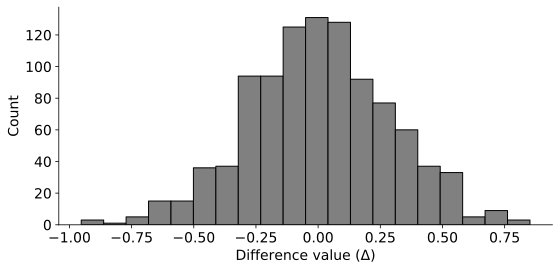

In [5]:
# plot
plt.figure(figsize=(8,4))
plt.hist(meandiff,bins=20,edgecolor='k',color='gray')
plt.xlabel(r'Difference value ($\Delta$)')
plt.ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.3: Distribution assuming $H_0$ is true

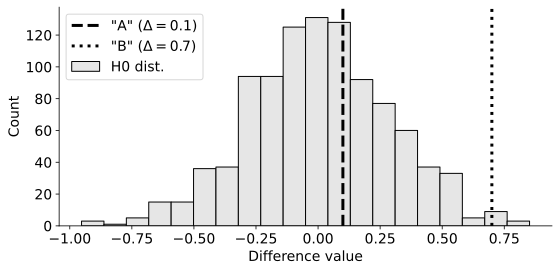

In [6]:
# plot
plt.figure(figsize=(8,4))

plt.hist(meandiff,bins=20,edgecolor='k',color=(.9,.9,.9))
plt.axvline(.1,color='k',linestyle='--',linewidth=3)
plt.axvline(.7,color='k',linestyle=':',linewidth=3)
plt.xlabel('Difference value')
plt.ylabel('Count')
plt.legend([r'"A" ($\Delta = 0.1$)',r'"B" ($\Delta = 0.7$)','H0 dist.'])

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.4: analytical vs. empirical $H_0$ Distribution

In [7]:
empirical = np.random.normal(loc=0,scale=1,size=10000)
x = np.linspace(-4,4,1001)
analytical = stats.norm.pdf(x) * np.diff(x[:2])

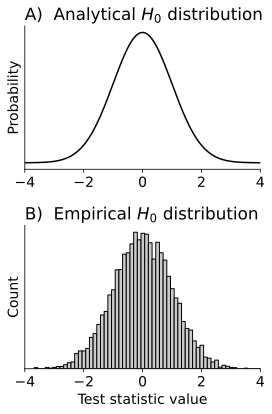

In [8]:
# plot
_,axs = plt.subplots(2,1,figsize=(4,6))

# analytical distribution
axs[0].plot(x,analytical,'k')
axs[0].set_title(r'A)  Analytical $H_0$ distribution')
axs[0].set(xlim=[-4,4],yticks=[],ylabel='Probability')

# empirical distribution
axs[1].hist(empirical,bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1].set_title(r'B)  Empirical $H_0$ distribution')
axs[1].set(xlim=[-4,4],yticks=[],ylabel='Count',xlabel='Test statistic value')

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.5: p-values and thresholds

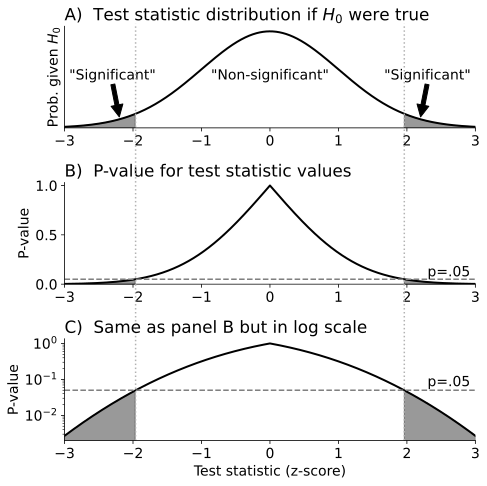

In [9]:
# create a Gaussian probability curve
zvals = np.linspace(-3,3,1001)
zpdf  = stats.norm.pdf(zvals)


_,axs = plt.subplots(3,1,figsize=(7,7))

# plot the probability function and the vertical lines
axs[0].plot(zvals,zpdf,'k',linewidth=2)
axs[0].set(xlim=zvals[[0,-1]],ylim=[0,.42],yticks=[],ylabel='Prob. given $H_0$')


# two-tailed p-values
pvalsL = stats.norm.cdf(zvals[:np.argmin(zvals**2)])
pvalsR = 1-stats.norm.cdf(zvals[np.argmin(zvals**2):])
pvals2 = 2*np.concatenate((pvalsL,pvalsR),axis=0) # doubled for a two-tailed test

# plot the probability function and the vertical lines
for i in range(1,3):
  axs[i].plot(zvals,pvals2,'k',linewidth=2)
  axs[i].set(xlim=zvals[[0,-1]],ylabel='P-value')
  axs[i].axhline(.05,color=(.5,.5,.5),linestyle='--')



# draw patches for significant regions
zidx = np.arange(np.argmin((zvals-stats.norm.ppf(.025))**2))
axs[0].fill_between(zvals[zidx],zpdf[zidx],color='k',alpha=.4)
axs[1].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)
axs[2].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)

zidx = np.arange(np.argmin((zvals-stats.norm.ppf(.975))**2),len(zvals))
axs[0].fill_between(zvals[zidx],zpdf[zidx],color='k',alpha=.4)
axs[1].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)
axs[2].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)

axs[2].axvline(x=zvals[np.argmin((zvals-stats.norm.ppf(.025))**2)],ymin=0,ymax=4.1,c=(.7,.7,.7),linestyle=':',clip_on=False)
axs[2].axvline(x=zvals[np.argmin((zvals-stats.norm.ppf(.975))**2)],ymin=0,ymax=4.1,c=(.7,.7,.7),linestyle=':',clip_on=False)




# indicators
axs[0].annotate('"Significant"',xy=(-2.2,stats.norm.pdf(-2.2)+.01),xytext=(-2.3,.2),ha='center',arrowprops={'color':'k'})
axs[0].annotate('"Significant"',xy=( 2.2,stats.norm.pdf( 2.2)+.01),xytext=( 2.3,.2),ha='center',arrowprops={'color':'k'})
axs[0].text(0,.2,'"Non-significant"',ha='center')
axs[1].text(2.3,.08,'p=.05')
axs[2].text(2.3,.065,'p=.05')


# panel titles
axs[0].set_title(r'A)  Test statistic distribution if $H_0$ were true')
axs[1].set_title(r'B)  P-value for test statistic values')
axs[2].set_title(r'C)  Same as panel B but in log scale')


axs[2].set(yscale='log',xlabel='Test statistic (z-score)')
axs[1].set_ylim([0,1.03])

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.6: $H_0$ distribution with critical value

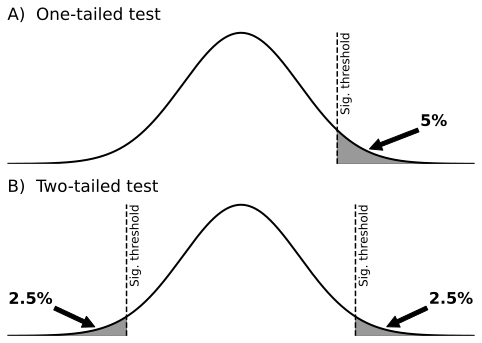

In [10]:
# create a Gaussian probability curve
x = np.linspace(-4,4,1001)
gpdf = stats.norm.pdf(x)

# create the figure and axis objects
_,axs = plt.subplots(2,1,figsize=(7,5))


# the find the indices of the 95% of the distribution
ubndi = np.argmin(np.abs(x-stats.norm.ppf(.95)))

# plot the probability function and the vertical lines
axs[0].plot(x,gpdf,'k',linewidth=2)
axs[0].set(xlim=x[[0,-1]],ylim=[0,.42],xticks=[],yticks=[],
       xlabel='Test statistic',ylabel='Probability')

# create patches for the significant area
axs[0].fill_between(x[ubndi:],gpdf[ubndi:],color='k',alpha=.4)

# annotations
tailx = np.argmin(np.abs(x-2.2))
axs[0].annotate('5%',xy=(x[tailx],gpdf[tailx]+.01),
            xytext=(x[tailx]+1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)

# significance threshold line
axs[0].plot([x[ubndi],x[ubndi]],[0,.4],'k--')
axs[0].annotate('Sig. threshold',xy=[x[ubndi]+.05,.4],va='top',rotation=90,size=12)







# the find the indices of the 2.5% and 97.5%
lbndi = np.argmin(np.abs(x-stats.norm.ppf(.025)))
ubndi = np.argmin(np.abs(x-stats.norm.ppf(1-.025)))


# plot the probability function and the vertical lines
axs[1].plot(x,gpdf,'k',linewidth=2)
axs[1].set(xlim=x[[0,-1]],ylim=[0,.42],xticks=[],yticks=[],
       xlabel='Test statistic',ylabel='Probability')


# now create patches for the significant area
axs[1].fill_between(x[:lbndi+1],gpdf[:lbndi+1],color='k',alpha=.4)

# significance threshold line
axs[1].plot([x[lbndi],x[lbndi]],[0,.4],'k--')
axs[1].annotate('Sig. threshold',xy=[x[lbndi]+.05,.4],va='top',rotation=90,size=12)


# repeat for the right lobe
axs[1].fill_between(x[ubndi:],gpdf[ubndi:],color='k',alpha=.4)


# annotations
tailx = np.argmin(np.abs(x--2.5))
axs[1].annotate('2.5%',xy=(x[tailx],gpdf[tailx]+.01),
            xytext=(x[tailx]-1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)
tailx = np.argmin(np.abs(x-2.5))
axs[1].annotate('2.5%',xy=(x[tailx],gpdf[tailx]+.01),
            xytext=(x[tailx]+1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)


# significance threshold line
axs[1].plot([x[ubndi],x[ubndi]],[0,.4],'k--')
axs[1].annotate('Sig. threshold',xy=[x[ubndi]+.05,.4],va='top',rotation=90,size=12)



# a few other niceties
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title(r'A)  One-tailed test')
axs[1].set_title(r'B)  Two-tailed test')

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.7: Area of z>1

In [11]:
# create a Gaussian probability curve
z = np.linspace(-4,4,1001)
gpdf = stats.norm.pdf(z)

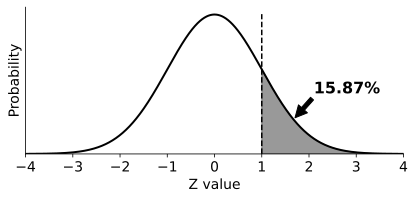

In [12]:
# plot
_,ax = plt.subplots(1,figsize=(6,3))


# note that the cdf returns the area *left* of the input value,
# so we subtract 1 to get the area to the *right*.
areaZ1 = 1-stats.norm.cdf(1)

# plot the probability function and the vertical lines
ax.plot(z,gpdf,'k',linewidth=2)
ax.set(xlim=z[[0,-1]],ylim=[0,.42],yticks=[],
       xlabel='Z value',ylabel='Probability')

xidx = np.arange(np.argmin(np.abs(z-1)),len(z))
ax.fill_between(z[xidx],gpdf[xidx],color='k',alpha=.4)



# annotations
tailx = np.argmin(np.abs(x-1.7))
ax.annotate(f'{100*areaZ1:.2f}%',xy=(z[tailx],gpdf[tailx]+.01),
            xytext=(z[tailx]+1.1,gpdf[tailx]+.08),ha='center',
            arrowprops={'color':'k'},weight='bold',size=16)

# significance threshold line
ax.plot([1,1],[0,.4],'k--',linewidth=1.5)

# display the figure
plt.tight_layout()
plt.show()

### Fig 10.8: p-z pairs

In [13]:
# critical p-values to draw
ps2draw = [ .05,.01,.001 ]

stds = np.linspace(-4,4,1001)
prob = stats.norm.pdf(stds)


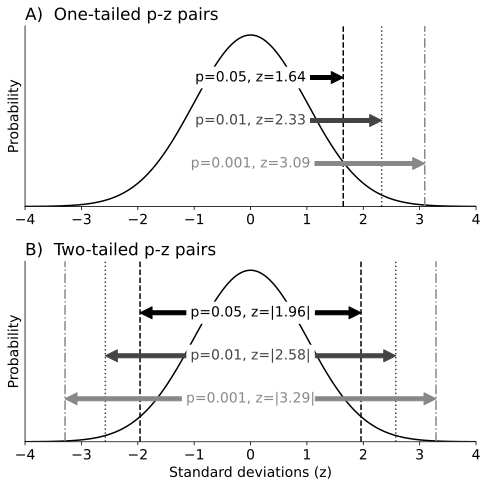

In [14]:
# plot
_,axs = plt.subplots(2,1,figsize=(7,7))

# draw the lines
for a in axs:
  a.plot(stds,prob,'k')
  a.set(ylabel='Probability',yticks=[],xlim=stds[[0,-1]],ylim=[0,.42])



## one-tailed
styles = ['--',':','-.']
for i,p in enumerate(ps2draw):

  # z-value for this p-value
  zval = stats.norm.ppf(1-p)

  # vertical line
  c = i/len(ps2draw)*.8 # line color
  axs[0].axvline(zval,color=(c,c,c),linestyle=styles[i])

  # arrow and text
  axs[0].annotate(f'p={p}, z={zval:.2f}',xy=(zval,.2-(i-1)/10),xytext=(0,.2-(i-1)/10),color=[c,c,c],
                  bbox=dict(fc='w',edgecolor='none'),
                  ha='center',va='center',arrowprops={'color':(c,c,c)})



## two-tailed
for i,p in enumerate(ps2draw):

  # z-value for this p-value
  zval = stats.norm.ppf(p/2)

  # vertical line
  c = i/len(ps2draw)*.8 # line color
  axs[1].axvline(zval,color=(c,c,c),linestyle=styles[i])
  axs[1].axvline(-zval,color=(c,c,c),linestyle=styles[i])

  # arrow and text
  axs[1].annotate(f'p={p}, z=|{abs(zval):.2f}|',xy=(zval,.2-(i-1)/10),xytext=(0,.2-(i-1)/10),color=[c,c,c],
                  bbox=dict(fc='w',edgecolor='none'),
                  ha='center',va='center',arrowprops={'color':(c,c,c)})
  axs[1].annotate('',xy=(-zval,.2-(i-1)/10),xytext=(1.15,.2-(i-1)/10),arrowprops={'color':(c,c,c)})




# panel labels
axs[0].set_title(r'A)  One-tailed p-z pairs')
axs[1].set_title(r'B)  Two-tailed p-z pairs')
axs[1].set(xlabel='Standard deviations (z)')

# display the figure
plt.tight_layout()
plt.show()

### Getting p-values from z-values

In [15]:
zval = 1
pval = stats.norm.cdf(zval)

print(f'The p-value for z = {zval:.2f} is p = {1-pval:.4f}')

The p-value for z = 1.00 is p = 0.1587
